In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [12]:
data=pd.read_csv('2022 MLB Player Stats - Batting.csv',delimiter=';')
teams=data[data['Lg']=='NL'].groupby(['Lg','Tm'])['H'].mean()
u=sum(teams)/len(teams)
o2=sum(a**2 for a in teams)/len(teams)-u**2
normalized=list(map(lambda x:(x-u)/o2, teams))

[('NL', 'ARI') ('NL', 'ATL') ('NL', 'CHC') ('NL', 'CIN') ('NL', 'COL')
 ('NL', 'LAD') ('NL', 'MIA') ('NL', 'MIL') ('NL', 'NYM') ('NL', 'PHI')
 ('NL', 'PIT') ('NL', 'SDP') ('NL', 'SFG') ('NL', 'STL') ('NL', 'TOT')
 ('NL', 'WSN')]


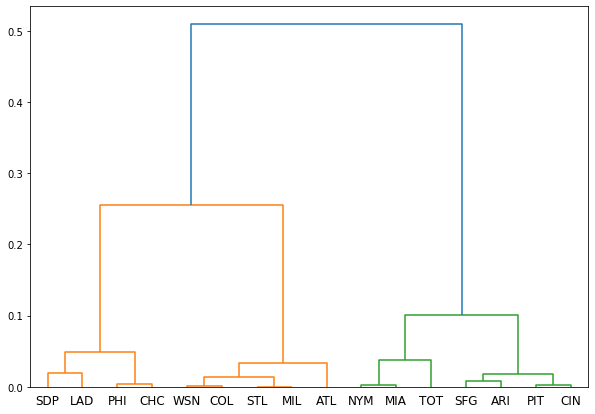

In [18]:
linked=linkage(np.reshape(normalized,(len(normalized),1)),'ward')
plt.figure(figsize=(10,7))
equipos=list(a for b,a in teams.index.values)
dendrogram(linked,orientation='top',labels=equipos,distance_sort='descending',show_leaf_counts=True)
plt.show()